### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('C:\\Users\\gorin\\Downloads\\3.10_non_linear.csv', sep=',')
data.head()


,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

Качество на валидации: 0.079
Качество на обучении: 0.070


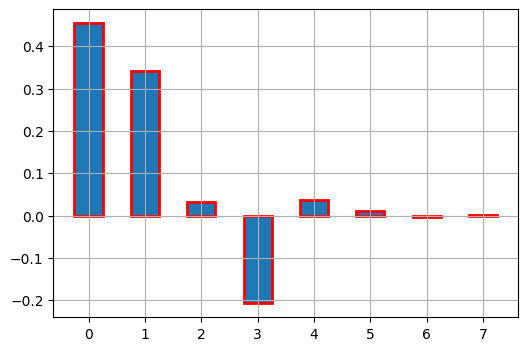

In [3]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0.8).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))
y = model.coef_
x = [i for i in range(len(y))]
ax.bar(x, y, width=0.5, linewidth=2, edgecolor='r')
ax.grid()
plt.show()

Качество на валидации: 0.093
Качество на обучении: 0.155


C:\Users\gorin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.713e+00, tolerance: 2.448e-03
  model = cd_fast.enet_coordinate_descent(


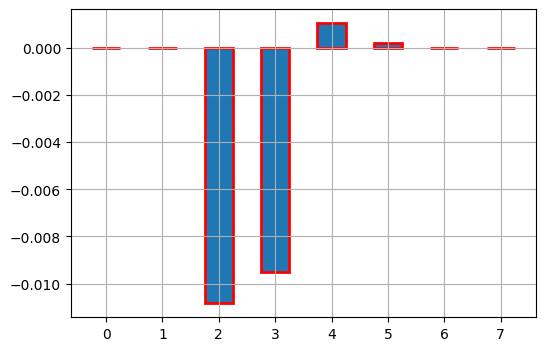

In [4]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Lasso(alpha=0.8).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))
y = model.coef_
x = [i for i in range(len(y))]
ax.bar(x, y, width=0.5, linewidth=2, edgecolor='r')
ax.grid()

### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Загрузка данных о ценах на недвижимость в Лондоне
london = fetch_openml(data_id=42165, as_frame=True)
X = london.data.drop('price', axis=1)  # признаки (features)
y = london.data['price']  # целевая переменная (target variable)


KeyError: "['price'] not found in axis"

In [ ]:
# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:

# Разделение данных на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)


In [7]:

# Обучение модели
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=10)
model.fit(X_train, y_train)




ValueError: could not convert string to float: 'x_train'

In [8]:


# Предсказание
y_pred = model.predict(X_valid)




AttributeError: 'NoneType' object has no attribute 'T'

In [9]:


# Оценка качества на валидации
r2 = r2_score(y_valid, y_pred)
print("Качество на валидации (R^2-score): %.3f" % r2)




ValueError: Found input variables with inconsistent numbers of samples: [11, 10]

In [10]:


# Количество итераций
n_iterations = model.n_iter_
print("Количество итераций: ", n_iterations)


AttributeError: 'SGDRegressor' object has no attribute 'n_iter_'

In [11]:
import matplotlib.pyplot as plt

# Обучение модели, предсказание и оценка качества (как и ранее)
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
r2 = r2_score(y_valid, y_pred)
print("Качество на валидации (R^2-score): %.3f" % r2)
n_iterations = model.n_iter_
print("Количество итераций: ", n_iterations)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.5)  # точки, представляющие фактические и предсказанные значения
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], 'r--')  # линия идеального соответствия
plt.xlabel('Фактические цены')
plt.ylabel('Предсказанные цены')
plt.title('График фактических и предсказанных цен на недвижимость в Лондоне')
plt.grid(True)
plt.show()


ValueError: could not convert string to float: 'x_train'

In [23]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Загрузка данных о ценах на недвижимость в Бостоне
boston = fetch_openml(data_id=411, as_frame=True)
X = boston.data.drop(boston.data.columns[13], axis=1)  # признаки (features)
y = boston.data[boston.data.columns[13]]  # целевая переменная (target variable)

# Преобразование категориальных данных
categorical_features = [X.columns[5], X.columns[10]]
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(sparse_output=False), categorical_features)],
    remainder='passthrough'
)
X = ct.fit_transform(X)

# Получение индексов числовых столбцов
numerical_features_indices = list(range(X.shape[1]))
for i in ct.transformers_[0][2]:
    numerical_features_indices.remove(i)

# Нормализация числовых данных
scaler = StandardScaler()
X[:, numerical_features_indices] = scaler.fit_transform(X[:, numerical_features_indices])

# Разделение данных на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

# Обучение модели
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=10)
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_valid)

# Оценка качества на валидации
r2 = r2_score(y_valid, y_pred)
print("Качество на валидации (R^2-score): %.3f" % r2)

# Количество итераций
n_iterations = model.n_iter_
print("Количество итераций: ", n_iterations)


ValueError: list.remove(x): x not in list